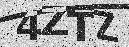

In [1]:
from PIL import Image
Image.open('captua.png')

In [2]:
import cv2
img = cv2.imread('captua.png')

In [3]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30 , 7 , 21)

In [4]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)

In [5]:
ret,thresh = cv2.threshold(dst,127,255,cv2.THRESH_BINARY_INV)

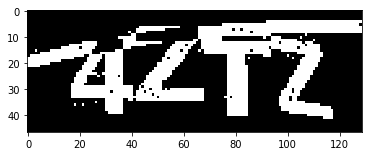

In [6]:
plt.imshow(thresh)
plt.show()

In [7]:
imgarr = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

In [8]:
imgarr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
imgarr.shape

(47, 129)

In [10]:
imgarr[:,5:115] = 0

In [11]:
imgarr.shape

(47, 129)

In [12]:
imgarr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
import numpy as np
from sklearn.preprocessing import binarize
imagedata = np.where(imgarr == 255)

In [14]:
imagedata

(array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8, 15, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20,
        20, 20, 20, 20, 21, 21, 21, 21, 21, 37, 37, 38, 38, 38, 39, 39, 39,
        40, 40, 40, 41, 41, 41]),
 array([115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128,   3,   1,   2,   3,   4,   0,   1,   2,   3,
          4,   0,   1,   2,   3,   4,   0,   1,   2,   3,   4,   0,   1,

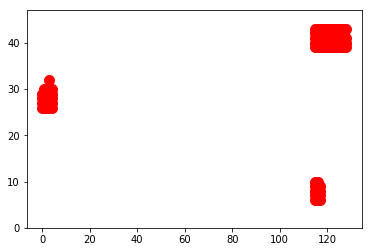

In [27]:
import matplotlib.pyplot as plt
plt.scatter(imagedata[1], 47 - imagedata[0], s = 100, c = 'red', label = 'Cluster 1')
plt.ylim(ymin=0)  
plt.ylim(ymax=47) 
plt.show()

In [28]:
X = np.array([imagedata[1]])
Y = 47 - imagedata[0]

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X.T)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
X2 = np.array([[i for i in range(0,119)]])
X2

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]])

In [31]:
X2_ = poly_reg.fit_transform(X2.T)

Populating the interactive namespace from numpy and matplotlib


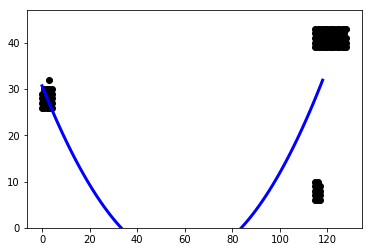

In [20]:
%pylab inline
plt.scatter(X,Y, color="black")
plt.ylim(ymin=0)
plt.ylim(ymax=47)
plt.plot(X2.T, regr.predict(X2_), color= "blue", linewidth = 3)

In [21]:
print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

Coefficient:[ 0.         -1.28903394  0.01101148]
Intercept:30.6858148377


In [22]:
newimg =  cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

In [23]:
for ele in np.column_stack([regr.predict(X2_).round(0),X2[0],] ):
    pos = 47-int(ele[0])
    #if newimg[pos-4:pos+4,int(ele[1])] == 255:
    #newimg[pos-3:pos+3,int(ele[1])] = 0 
    newimg[pos-3:pos+3,int(ele[1])] = 255 - newimg[pos-3:pos+3,int(ele[1])]

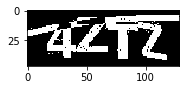

In [24]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(thresh)

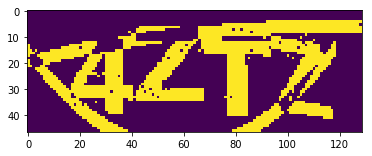

In [25]:
#plt.subplot(122)
plt.imshow(newimg)
plt.savefig('{}.png'.format('canCut'))